# Gráficos de Resíduos

Os resíduos, no contexto dos modelos de regressão, são a diferença entre 
o valor observado da variável-alvo (y) e o valor previsto (ŷ), 
por exemplo, o erro da previsão.

O gráfico de resíduos mostra a diferença 
entre os resíduos no eixo vertical e a variável dependente no eixo horizontal 
eixo horizontal, permitindo detectar regiões dentro do alvo que podem ser suscetíveis a mais ou menos 
ser suscetíveis a mais ou menos erros.

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Exemplo 1 (Dados de Exemplo):

In [60]:
sns.set(style="whitegrid")

In [61]:
# Dataset de exemplo com y - x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

## Método 1 (Seaborn) 

<Axes: >

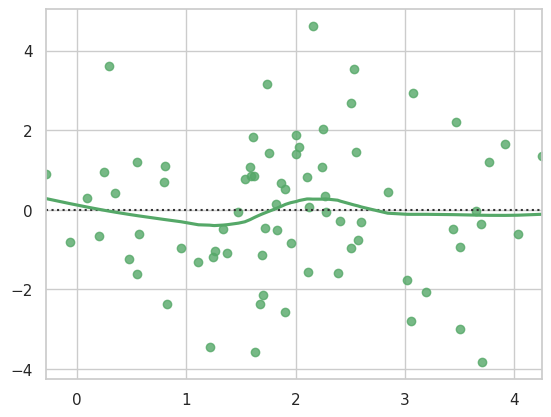

In [62]:
# Traçar os resíduos após o ajuste de um modelo linear
sns.residplot(x=x,
              y=y,
              lowess=True, color="g")

## Método 2 (Statsmodel)

In [63]:
# Criar um DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Ajustar um modelo de regressão linear
X = sm.add_constant(data['x'])  # Adicionar uma constante para o intercepto
model = sm.OLS(data['y'], X).fit()

# Obter os resíduos
residuos = model.resid

In [64]:
# Resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     63.49
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           1.62e-11
Time:                        14:03:00   Log-Likelihood:                -147.27
No. Observations:                  75   AIC:                             298.5
Df Residuals:                      73   BIC:                             303.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8831      0.421      4.476      0.0

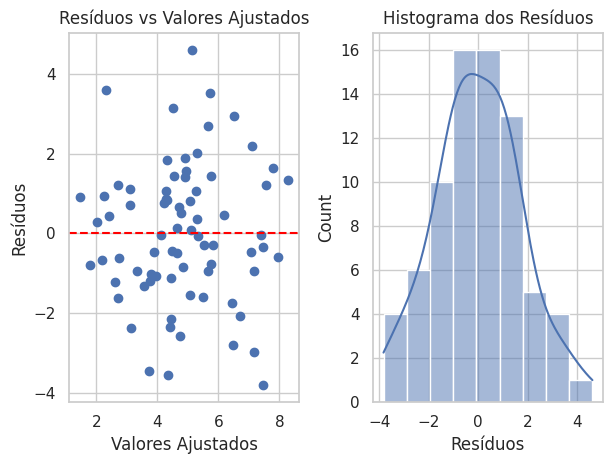

In [65]:
# Gráfico de dispersão dos resíduos
plt.subplot(1, 2, 1)
plt.scatter(model.fittedvalues, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')

# Histograma dos resíduos
plt.subplot(1, 2, 2)
sns.histplot(residuos, kde=True)
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')

plt.tight_layout()
plt.show()

---

---

## Exemplo 2:

In [66]:
%matplotlib inline

## Database de Emissões por Veículos

In [67]:
base = pd.read_csv("final_co2.csv")

In [71]:
base.head()

,Unnamed: 0,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions,Fuel_Type_E,Fuel_Type_X,...,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,0,2.0,4,9.9,6.7,8.5,33,196,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,2.4,4,11.2,7.7,9.6,29,221,0,0,...,0,0,1,0,1,0,0,0,0,0
2,2,3.5,6,12.7,9.1,11.1,25,255,0,0,...,0,0,0,0,1,0,0,1,0,0
3,3,3.5,6,12.1,8.7,10.6,27,244,0,0,...,0,0,0,0,1,0,0,1,0,0
4,4,3.5,6,11.9,7.7,10.0,28,230,0,0,...,0,0,0,0,1,0,0,0,1,0


In [72]:
base.describe()

,Unnamed: 0,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions,Fuel_Type_E,Fuel_Type_X,...,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
count,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,...,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000
mean,2907.000000,3.014153,5.391574,12.232743,8.831212,10.702631,27.665692,246.010490,0.038349,0.501290,...,0.005847,0.028891,0.129837,0.013242,0.025795,0.441617,0.083405,0.278074,0.325709,0.112984
std,1678.790239,1.215639,1.517436,2.858833,1.864979,2.379126,6.043588,50.211144,0.192054,0.500041,...,0.076248,0.167514,0.336153,0.114318,0.158538,0.496622,0.276517,0.448089,0.468680,0.316600
min,0.000000,0.900000,3.000000,5.600000,4.500000,6.000000,16.000000,128.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1453.500000,2.000000,4.000000,10.000000,7.400000,8.900000,23.000000,207.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2907.000000,3.000000,6.000000,11.900000,8.600000,10.400000,27.000000,242.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4360.500000,3.600000,6.000000,14.100000,9.900000,12.300000,32.000000,281.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,5814.000000,6.200000,8.000000,21.300000,14.500000,18.100000,47.000000,407.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
target_column = "CO2_Emissions"

### Dataprep

#### LImpar Colunas Sujas

In [21]:
base.columns

Index(['Unnamed: 0', 'Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb',
       'Fuel_Consumption_Comb_mpg', 'CO2_Emissions', 'Fuel_Type_E',
       'Fuel_Type_X', 'Fuel_Type_Z', 'Transmission_A4', 'Transmission_A5',
       'Transmission_A6', 'Transmission_A7', 'Transmission_A8',
       'Transmission_A9', 'Transmission_AM5', 'Transmission_AM6',
       'Transmission_AM7', 'Transmission_AM8', 'Transmission_AM9',
       'Transmission_AS10', 'Transmission_AS4', 'Transmission_AS5',
       'Transmission_AS6', 'Transmission_AS7', 'Transmission_AS8',
       'Transmission_AS9', 'Transmission_AV', 'Transmission_AV10',
       'Transmission_AV6', 'Transmission_AV7', 'Transmission_AV8',
       'Transmission_M5', 'Transmission_M6', 'Transmission_M7',
       'Make_Type_Luxury', 'Make_Type_Premium', 'Make_Type_Sports',
       'Vehicle_Class_Type_SUV', 'Vehicle_Class_Type_Sedan',
       'Vehicle_Class_Type_Truck'],
      dtype='object')

In [26]:
try:
    base = base.drop(columns=["Unnamed: 0"])
except:
    pass

In [27]:
base.columns

Index(['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb',
       'Fuel_Consumption_Comb_mpg', 'CO2_Emissions', 'Fuel_Type_E',
       'Fuel_Type_X', 'Fuel_Type_Z', 'Transmission_A4', 'Transmission_A5',
       'Transmission_A6', 'Transmission_A7', 'Transmission_A8',
       'Transmission_A9', 'Transmission_AM5', 'Transmission_AM6',
       'Transmission_AM7', 'Transmission_AM8', 'Transmission_AM9',
       'Transmission_AS10', 'Transmission_AS4', 'Transmission_AS5',
       'Transmission_AS6', 'Transmission_AS7', 'Transmission_AS8',
       'Transmission_AS9', 'Transmission_AV', 'Transmission_AV10',
       'Transmission_AV6', 'Transmission_AV7', 'Transmission_AV8',
       'Transmission_M5', 'Transmission_M6', 'Transmission_M7',
       'Make_Type_Luxury', 'Make_Type_Premium', 'Make_Type_Sports',
       'Vehicle_Class_Type_SUV', 'Vehicle_Class_Type_Sedan',
       'Vehicle_Class_Type_Truck'],
      dtype='object')

In [29]:
X = base.drop(columns = target_column)
y = base[[target_column]]

In [31]:
y

,CO2_Emissions
0,196
1,221
2,255
3,244
4,230
...,...
5810,219
5811,232
5812,240
5813,232


#### Treino e Teste 

In [32]:
train_size = 0.8
random_state = 42

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
X, y, test_size=train_size,random_state = random_state)

In [34]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, Y_train)

In [ ]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [37]:
pred_train

array([[184.39216646],
       [220.19189196],
       [268.80689032],
       ...,
       [245.41759791],
       [288.91615482],
       [198.40169324]])

Text(0, 0.5, 'Resíduos')

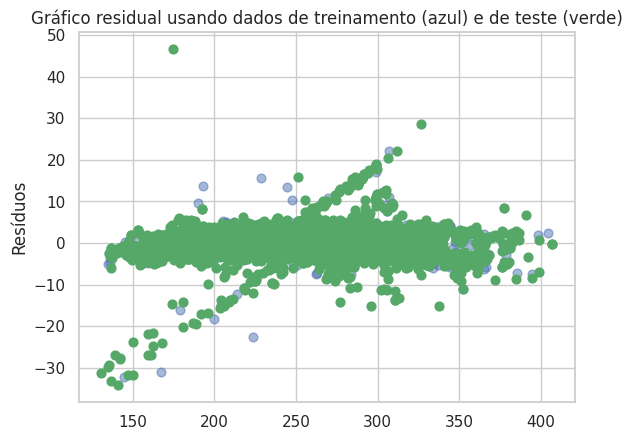

In [41]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.title('Gráfico residual usando dados de treinamento (azul) e de teste (verde)')
plt.ylabel('Resíduos')

In [57]:
def sklearn_summary(model, X, y):
    # Predict
    y_pred = model.predict(X)
    
    # Resíduos
    residuals = y - y_pred
    
    # R2
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_residual = np.sum(residuals ** 2)
    r_squared = 1 - (ss_residual / ss_total)


    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    
    # Report
    print("Report do Modelo de Regressão")
    print("-----------------------------------------------------")
    print(f"Intercepto: {model.intercept_}")
    print(f"Slope: {model.coef_[0]}")
    print(f"R-squared: {r_squared}")
    print(f"Número de observações: {len(y)}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("-----------------------------------------------------")

In [58]:
sklearn_summary(lm, X_test, Y_test)

Report do Modelo de Regressão
-----------------------------------------------------
Intercepto: [68.11924715]
Slope: [-2.62275062e-01  1.81325214e-01  6.99821529e+00  6.86111417e+00
  8.11243905e+00 -6.10913975e-01 -1.35643369e+02 -3.04625208e+01
 -3.14661336e+01 -6.93051092e+00 -4.85568616e+00 -4.79284962e+00
 -1.50386365e+00 -2.67798457e+00 -2.85177611e+00  7.59392549e-14
 -3.15556590e+00 -3.33699410e+00 -3.73587538e+00 -5.82584997e-01
 -2.60901513e+00 -9.28344767e+00 -5.56149023e+00 -4.16993130e+00
 -3.40972087e+00 -3.00278446e+00 -3.38848084e+00 -4.20260193e+00
 -1.42108547e-14 -4.65374656e+00 -3.84584158e+00 -4.01038046e+00
 -4.29359807e+00 -3.85155087e+00 -3.70522044e+00 -5.19272180e-01
 -5.88625161e-01 -5.64092882e-01 -5.14654491e-01  1.45466026e-01
 -5.08918694e-01]
R-squared: CO2_Emissions    0.994453
dtype: float64
Número de observações: 4652
Mean Absolute Error (MAE): 2.4528
Mean Squared Error (MSE): 13.9106
Root Mean Squared Error (RMSE): 3.7297
----------------------------

/home/glyph-vasts/D/Utilidades/Virtual_Envs/Python/data_science_studies/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


##### Usando Statsmodel

In [42]:
intercept = lm.intercept_
slope = lm.coef_[0]

In [44]:
X_sm = sm.add_constant(X)

In [45]:
model_stats = sm.OLS(y, X_sm).fit()

In [46]:
print(model_stats.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.675e+04
Date:                Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:22:26   Log-Likelihood:                -15753.
No. Observations:                5815   AIC:                         3.159e+04
Df Residuals:                    5773   BIC:                         3.187e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Database de Casas na Califórnia

In [13]:
from sklearn.datasets import fetch_california_housing # as load_boston
boston = fetch_california_housing() #load_boston()

bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
bos.columns = boston.feature_names
bos.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
bos['PRICE'] = boston.target

In [17]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)
lm = LinearRegression()
lm

LinearRegression()

In [20]:
bos.MedInc # Usando esse valor como se fosse o RM

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

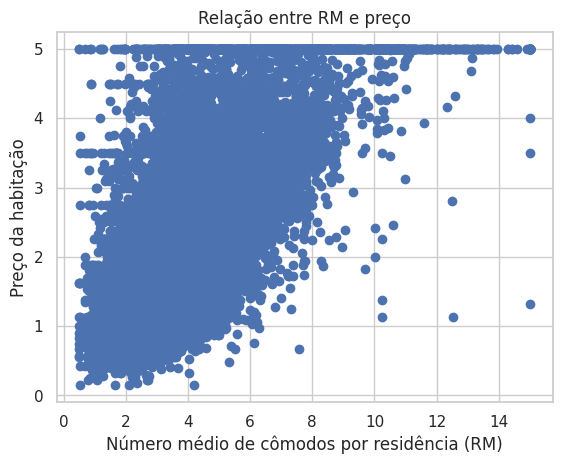

In [21]:
plt.scatter(bos.MedInc, bos.PRICE)
plt.xlabel("Número médio de cômodos por residência (RM)") # Não é o RM, na realidade
plt.ylabel("Preço da habitação")
plt.title("Relação entre RM e preço")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
X, bos.PRICE, test_size=0.33,random_state = 5)

In [24]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

Text(0, 0.5, 'Resíduos')

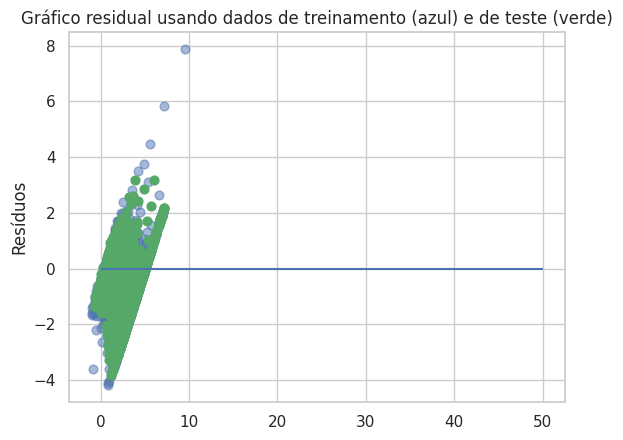

In [26]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin= 0, xmax= 50)
plt.title('Gráfico residual usando dados de treinamento (azul) e de teste (verde)')
plt.ylabel('Resíduos')